# Analyze the usage.csv in this folder

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## data description

df2 usage_cpu_e3_t25_main.csv: CPU only transforms

df3 usage_e3_t25_gpu_transforms.csv: GPU transforms but with transfer to the CPU

df4 data/usage_cpu_torch_empty_cuda_e3_t25.csv: Experiment with CPU only transform but resetting the CUDA cache on every iteration -> Learn how deep the memory sinks in between iterations

df5 data/usage_GPU_transforms_e5_little_cpu_transfer.csv

df6 All transforms are done on the GPU and no transfer on the CPU is done..


Missing:
3) Debug batch data and see where else data might be on the GPU..


What did not work:
- deletion of all non relevant entries in the batch data - apparently they are not the problem..
- 

In [2]:
df1 = pd.read_csv('data/2/usage.csv')
df2 = pd.read_csv('data/usage_cpu_e3_t25_main.csv')
df3 = pd.read_csv('data/usage_e3_t25_gpu_transforms.csv')
df4 = pd.read_csv('data/usage_cpu_torch_empty_cuda_e3_t25.csv')
df5 = pd.read_csv('data/usage_GPU_transforms_e5_little_cpu_transfer.csv')
df6 = pd.read_csv('data/usage_all_on_gpu_e_3.csv')
df = df4

In [3]:
print(df.describe())

       device  context  utilization  total memory (MB)  free memory (MB)  \
count  3498.0      0.0  3498.000000             3498.0       3498.000000   
mean      1.0      NaN    72.941967            81920.0      51286.837050   
std       0.0      NaN    34.733197                0.0       8622.345331   
min       1.0      NaN     0.000000            81920.0      34841.000000   
25%       1.0      NaN    60.000000            81920.0      46771.000000   
50%       1.0      NaN    92.000000            81920.0      49025.000000   
75%       1.0      NaN    94.000000            81920.0      52641.000000   
max       1.0      NaN   100.000000            81920.0      80403.000000   

       used memory (MB)  memory not used by torch (MB)  
count       3498.000000                    3498.000000  
mean       30633.162950                     819.896512  
std         8622.345331                       4.351136  
min         1517.000000                     620.000000  
25%        29279.000000       

In [4]:
df["time"] = pd.to_datetime(df["time"])

array([<Axes: >], dtype=object)

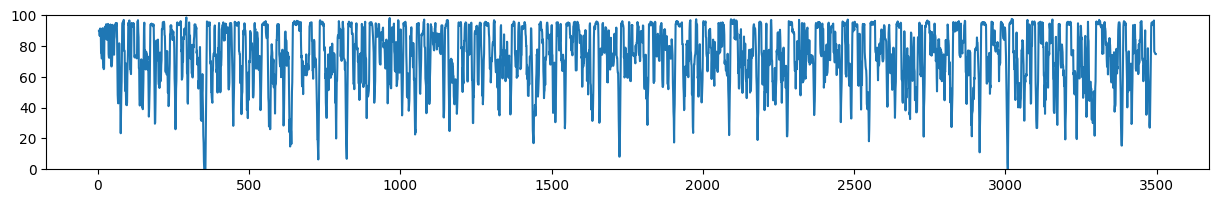

In [5]:
util = df.loc[:,"utilization"].rolling(5).sum()  / 5
util.plot(subplots=True, figsize=(15,2),ylim=(0,100))

In [6]:
# df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'].plot(
#     subplots=True, 
#     figsize=(15,10), 
#     ylim=(0,df.loc[:,"total memory (MB)"][0]))


In [7]:
# pd.DataFrame.plot(df.loc[:,"free memory (MB)":'Memory not used by torch (MB)'], subplots=True, 
#                 figsize=(15,10), 
#                 ylim=(0,df.loc[:,"total memory (MB)"][0]))

In [8]:
df["used memory moving average"] = df.loc[:,"used memory (MB)"].rolling(200).sum()  / 200

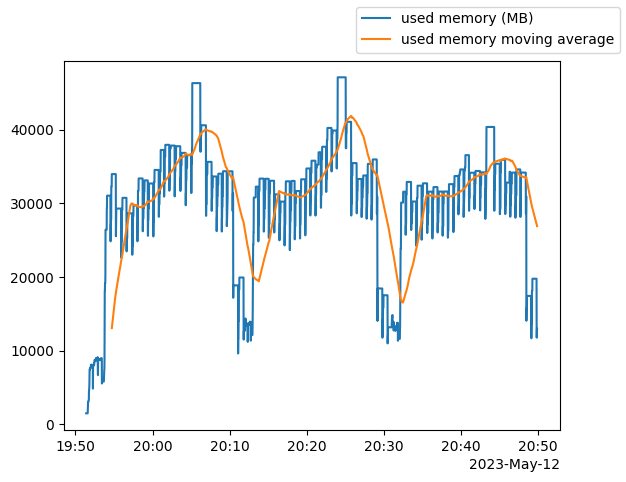

In [9]:
plot, ax = plt.subplots()
from_tick = 0
for i in ("used memory (MB)", "used memory moving average"):
    ax.plot(df.loc[from_tick:, 'time'], df.loc[from_tick:, i], label=i)
    
plot.legend()

cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

In [10]:
df.columns
df.shape[0]
df.loc[18000:, 'time']
# df.loc[:," total memory (MB)"][0]
# df.loc[:," Memory not used by torch (MB)"][10]

Series([], Name: time, dtype: datetime64[ns])